## Importing Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# import other required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Analyzing the data

In [4]:
df=pd.read_csv("imdb_movies.csv")
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [5]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [7]:
df.shape

(10178, 12)

In [8]:
df.replace("?",np.nan,inplace=True)
df.replace(" ",np.nan,inplace=True)

In [9]:
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [10]:
missing_data=df.isnull()
missing_data.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#counting missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

names
names
False    10178
Name: count, dtype: int64

date_x
date_x
False    10178
Name: count, dtype: int64

score
score
False    10178
Name: count, dtype: int64

genre
genre
False    10093
True        85
Name: count, dtype: int64

overview
overview
False    10178
Name: count, dtype: int64

crew
crew
False    10122
True        56
Name: count, dtype: int64

orig_title
orig_title
False    10178
Name: count, dtype: int64

status
status
False    10178
Name: count, dtype: int64

orig_lang
orig_lang
False    10178
Name: count, dtype: int64

budget_x
budget_x
False    10178
Name: count, dtype: int64

revenue
revenue
False    10178
Name: count, dtype: int64

country
country
False    10178
Name: count, dtype: int64



#### Dealing with the missing data

In [12]:
# the column "crew" is not required for any analysis, so we drop it.
df.drop(['crew', 'overview', ''], axis=1, inplace=True)


In [13]:
#the genre has some missing values so well will fill it by its frequency
#see which values are there in genre 
df.genre.value_counts()

genre
Drama                                                   556
Comedy                                                  373
Drama, Romance                                          268
Horror                                                  260
Horror, Thriller                                        202
                                                       ... 
Action, Animation, Crime, Drama                           1
Adventure, Animation, Family, Action                      1
Drama, Animation, Family, Comedy, Fantasy                 1
Science Fiction, War                                      1
Action, Adventure, Science Fiction, Thriller, Horror      1
Name: count, Length: 2303, dtype: int64

In [20]:
df.genre.replace(np.nan,"Drama",inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10178 non-null  object 
 4   overview    10178 non-null  object 
 5   orig_title  10178 non-null  object 
 6   status      10178 non-null  object 
 7   orig_lang   10178 non-null  object 
 8   budget_x    10178 non-null  float64
 9   revenue     10178 non-null  float64
 10  country     10178 non-null  object 
dtypes: float64(3), object(8)
memory usage: 874.8+ KB


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

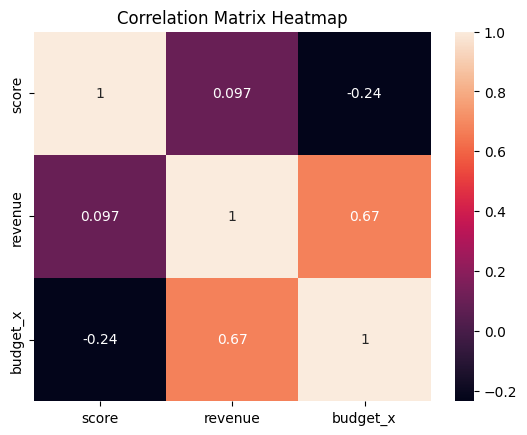

In [17]:
# find the correlation between the features
corr = df[["score", "revenue", "budget_x"]].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix Heatmap')

In [18]:
#now lets check which are the top 10 movies with high revenue
data=pd.DataFrame(df,columns=["names","revenue"])
data_sorted=data.sort_values(by="revenue",ascending=False)
data_sorted["revenue"]=data_sorted["revenue"]/1000000
pd.options.display.float_format="{:,.0f}".format
data_sorted.set_index('names', inplace=True)
ranking_rev = data_sorted.head(10)
ranking_rev

,revenue
names,
Avatar,"2,924"
Avengers: Endgame,"2,795"
Avatar: The Way of Water,"2,317"
Titanic,"2,223"
Titanic,"2,223"
Louis Tomlinson: All of Those Voices,"2,082"
Star Wars: The Force Awakens,"2,068"
Avengers: Infinity War,"2,048"
Rathinirvedam,"1,916"


We’ll use this piece of data frame to create our chart.

In [21]:
index=ranking_rev.index
values=ranking_rev["revenue"]
plot_title="Top 10 movies by revenue,usd million"
title_size=18
subtitle='Source: Kaggle / IMDB Movies'
x_label="revenue,usd million"
file_name="barh-plot"


Text(0.5, 36.72222222222221, 'revenue,usd million')

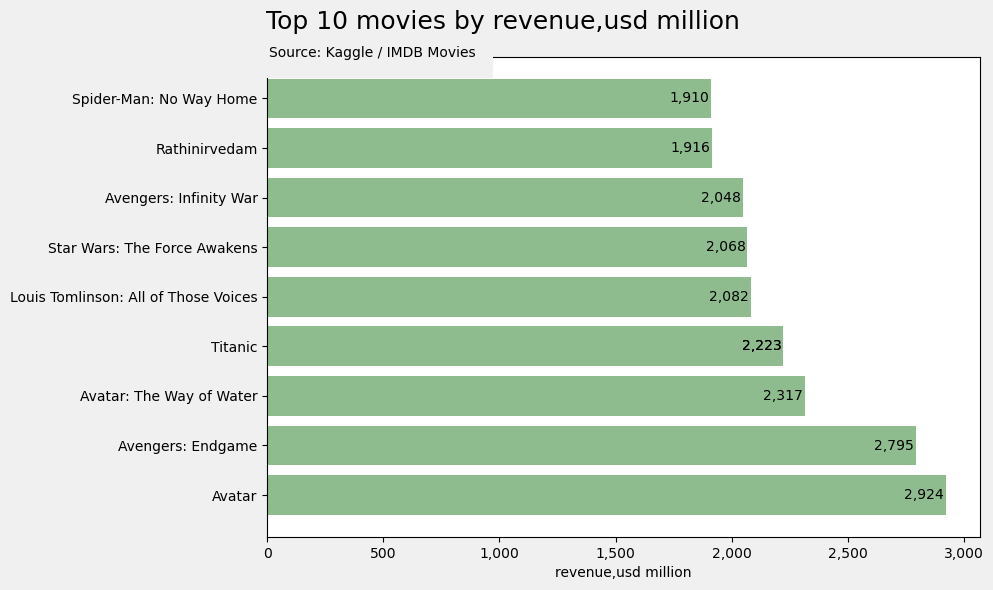

In [19]:
# draw a figure with a subplot. We’re using the viridis color scheme to create gradients later.
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()

# create bars
bar = ax.barh(index, values, color='darkseagreen')
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# set title, its font size, and position
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

# create bar labels/annotations
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'black')            # Change label color to white
    
# Set subtitle
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(x_label, color='black')


In [22]:
revenue_by_country=df.loc[:,["country","revenue"]]
revenue_by_country=revenue_by_country.groupby("country").sum()
Top_5_countries=revenue_by_country.nlargest(5,"revenue")/1000000
pd.options.display.float_format = '{:,.0f}'.format


In [23]:
index=Top_5_countries.index
values=Top_5_countries["revenue"]
plot_title= "Top 5 countries by revenue,usd million"
title_size=18
subtitle = 'Source: Kaggle / IMDB Movies'
x_label = 'Revenue, USD million'


Text(0.5, 36.72222222222221, 'Revenue, USD million')

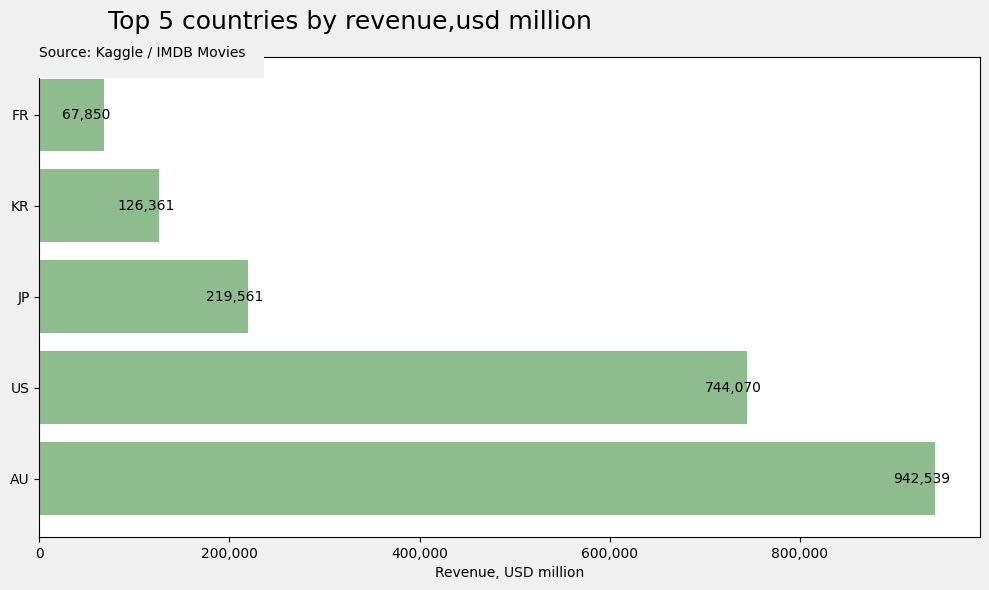

In [24]:
# draw a figure with a subplot. We’re using the viridis color scheme to create gradients later.
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()

# create bars
bar = ax.barh(index, values, color='darkseagreen')
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# set title, its font size, and position
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

# create bar labels/annotations
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'black')            # Change label color to white
    
# Set subtitle
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(x_label, color='black')

In [25]:
# Now we compare the Budget against the Revenue generated for the Top 10 movies with highest revenue
# Now we compare the Budget against the Revenue generated for the Top 10 movies with highest revenue
top_10_movies = df.sort_values('revenue', ascending=False).head(10)
top_10_movies.set_index('names', inplace=True)
top_10_movies

,date_x,score,genre,overview,orig_title,status,orig_lang,budget_x,revenue,country
names,,,,,,,,,,
Avatar,12/17/2009,76,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...",Avatar,Released,English,"237,000,000","2,923,706,026",AU
Avengers: Endgame,04/24/2019,83,"Adventure, Science Fiction, Action",After the devastating events of Avengers: Infi...,Avengers: Endgame,Released,English,"400,000,000","2,794,731,755",AU
Avatar: The Way of Water,12/15/2022,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,Avatar: The Way of Water,Released,English,"460,000,000","2,316,794,914",AU
Titanic,12/18/1997,79,"Drama, Romance",101-year-old Rose DeWitt Bukater tells the sto...,Titanic,Released,English,"200,000,000","2,222,985,568",AU
Titanic,04/11/1953,66,"Drama, Romance","Unhappily married, Julia Sturges decides to go...",Titanic,Released,English,"200,000,000","2,222,985,568",US
Louis Tomlinson: All of Those Voices,03/22/2023,91,"Documentary, Music",Ditching the typical glossy sheen of celebrity...,Louis Tomlinson: All of Those Voices,Released,English,"178,800,000","2,081,794,006",GB
Star Wars: The Force Awakens,12/17/2015,73,"Adventure, Action, Science Fiction, Fantasy",Thirty years after defeating the Galactic Empi...,Star Wars: The Force Awakens,Released,English,"245,000,000","2,068,223,624",AU
Avengers: Infinity War,04/25/2018,83,"Adventure, Action, Science Fiction",As the Avengers and their allies have continue...,Avengers: Infinity War,Released,English,"300,000,000","2,048,359,754",AU
Rathinirvedam,03/08/1978,95,Drama,The story takes place in a small village surro...,Rathinirvedam,Released,Malayalam,"227,800,000","1,916,346,675",IN


In [26]:
# now we keep only the columns budget_x and revenue and remove all other columns from the dataframe
# we also remove any duplicate values present in the dataframe

top_10_movies = top_10_movies[['budget_x','revenue']]
top_10_movies = top_10_movies.drop_duplicates()
top_10_movies

,budget_x,revenue
names,,
Avatar,"237,000,000","2,923,706,026"
Avengers: Endgame,"400,000,000","2,794,731,755"
Avatar: The Way of Water,"460,000,000","2,316,794,914"
Titanic,"200,000,000","2,222,985,568"
Louis Tomlinson: All of Those Voices,"178,800,000","2,081,794,006"
Star Wars: The Force Awakens,"245,000,000","2,068,223,624"
Avengers: Infinity War,"300,000,000","2,048,359,754"
Rathinirvedam,"227,800,000","1,916,346,675"
Spider-Man: No Way Home,"200,000,000","1,910,048,245"


Text(0, 0.5, 'Top 10 Movies')

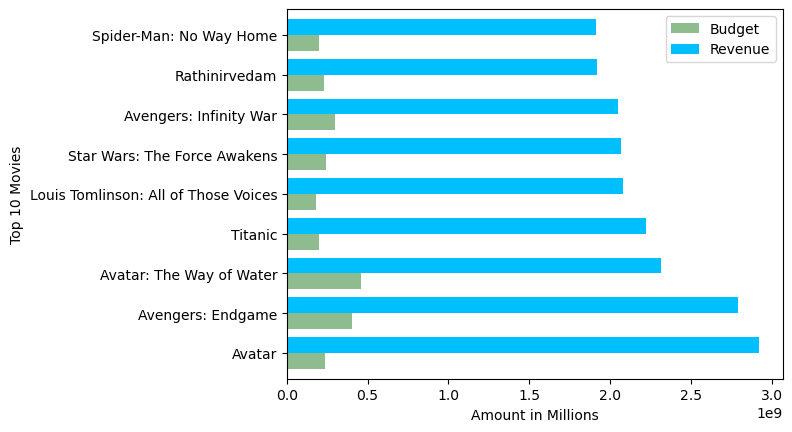

In [25]:
# now we plot a horizontal bar chart comparing the revenue generated against the budget for the top 10 movies

ax = top_10_movies.plot.barh(width=0.8, color=['darkseagreen', 'deepskyblue'])

custom_legend = ['Budget', 'Revenue']
ax.legend(custom_legend)    
ax.set_xlabel("Amount in Millions")
ax.set_ylabel("Top 10 Movies")

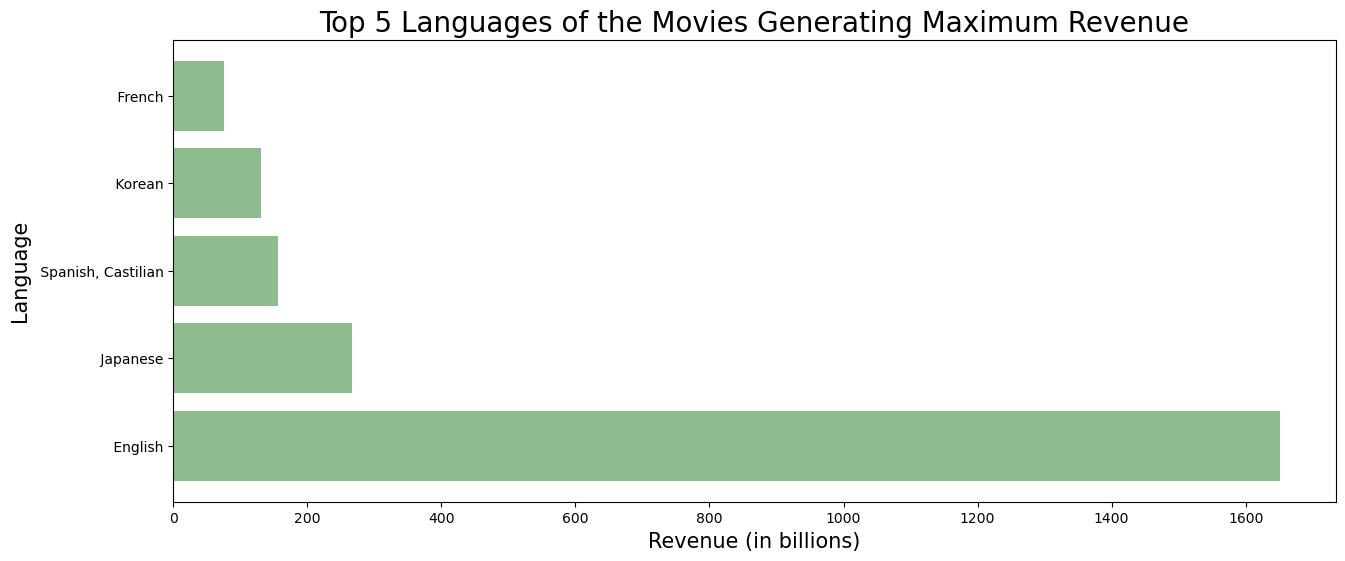

In [26]:
# now we check which are the top 5 languages of the movies which generate maximum revenue

rev_by_lang = df.loc[:, ['orig_lang', 'revenue']]
rev_by_lang = rev_by_lang.groupby('orig_lang').sum()
top_5_lang = rev_by_lang.nlargest(5, 'revenue')
top_5_lang

plt.figure(figsize=(15,6))
# Create a bar plot
plt.barh(top_5_lang.index, top_5_lang['revenue']/1000000000, color='darkseagreen')
plt.title('Top 5 Languages of the Movies Generating Maximum Revenue', fontsize=20)

# Label the axes
plt.ylabel('Language', fontsize=15)
plt.xlabel('Revenue (in billions)', fontsize=15)

# Show the plot
plt.show()

In [27]:

# now we check which is the most common Genre of movies produced 

genre_count= df['genre'].value_counts().head(10)
genre_count

Drama               641
Comedy              373
Drama, Romance      268
Horror              260
Horror, Thriller    202
Comedy, Romance     187
Documentary         146
Action, Thriller    122
Comedy, Drama       121
Romance             117
Name: genre, dtype: int64

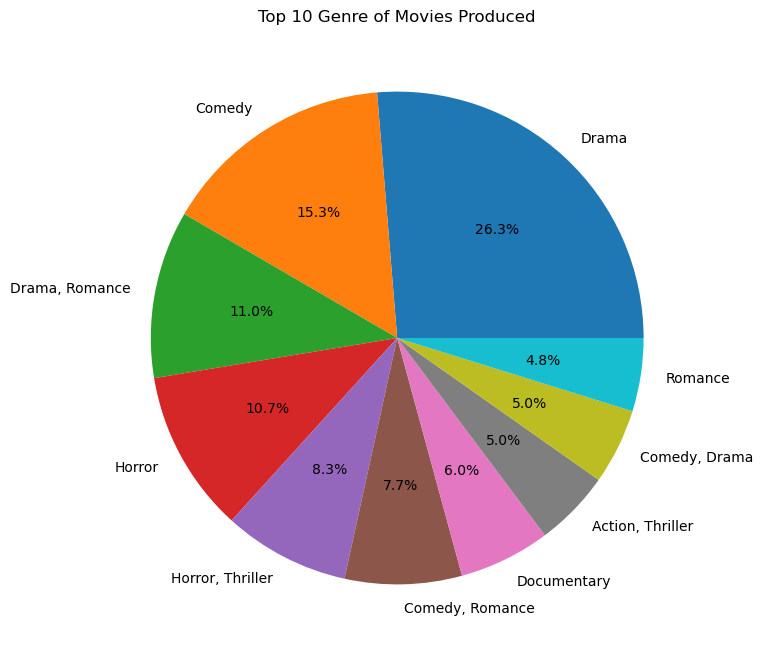

In [28]:
# plot a pie chart
plt.figure(figsize=(8,8))
plt.pie(genre_count, labels=genre_count.index, autopct="%0.01f%%")
plt.title('Top 10 Genre of Movies Produced')
plt.show()

In [29]:
orig_lang_count= df['orig_lang'].value_counts().head(10)
orig_lang_count

 English               7417
 Japanese               714
 Spanish, Castilian     397
 Korean                 388
 French                 285
 Chinese                153
 Cantonese              145
 Italian                142
 German                  93
 Russian                 66
Name: orig_lang, dtype: int64

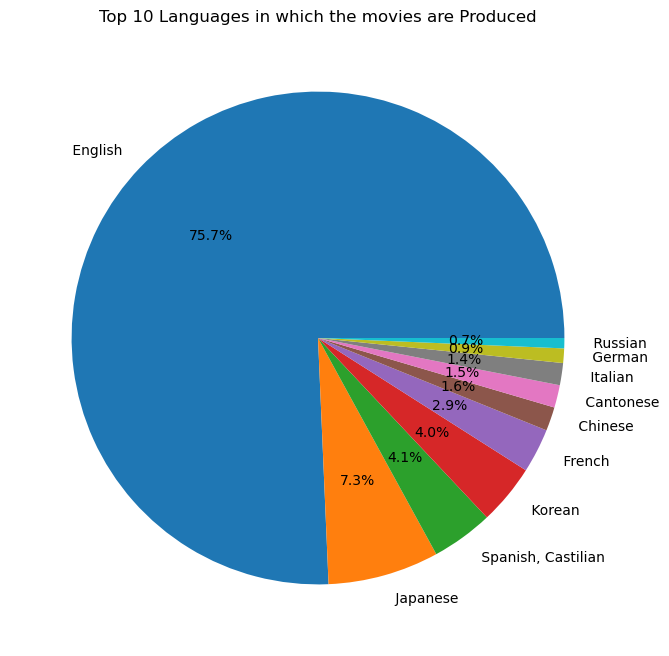

In [30]:
# plot a pie chart
plt.figure(figsize=(8,8))
plt.pie(orig_lang_count, labels=orig_lang_count.index, autopct="%0.01f%%")
plt.title('Top 10 Languages in which the movies are Produced')
plt.show()


In [27]:
# now we check the number of movies released per year

# convert the date_x column from string format to date format
df["date_x"]= pd.to_datetime(df["date_x"])

# Get the count of movies released per year
year_counts = df["date_x"].dt.year.value_counts().sort_index()

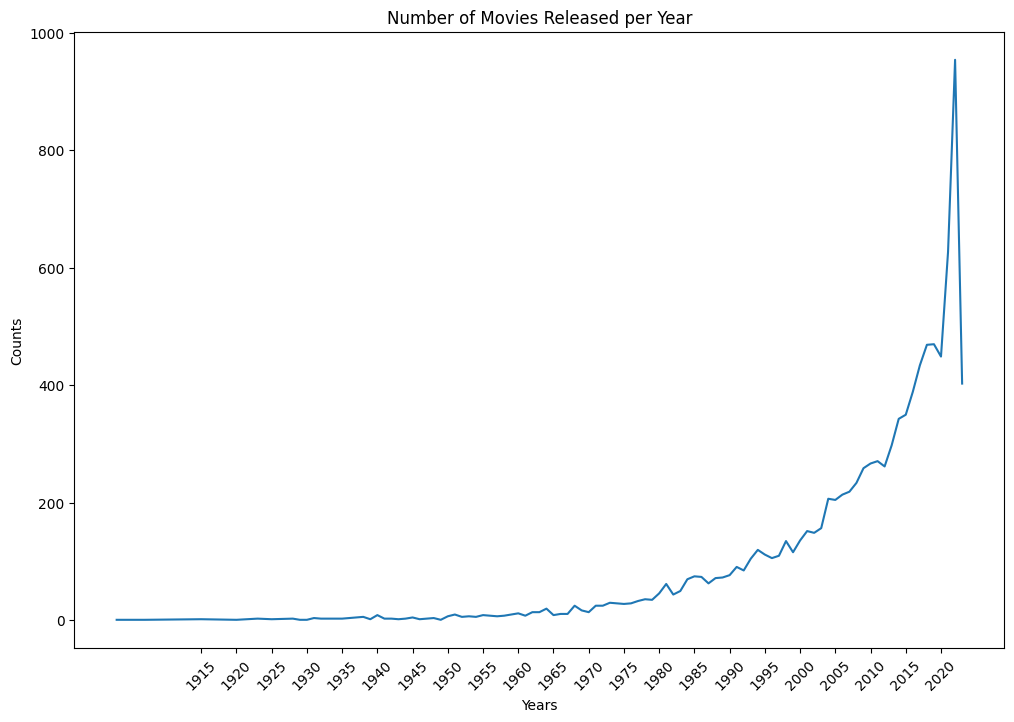

In [28]:
# Generate the plot
plt.figure(figsize=(12,8))
plt.plot(year_counts.index, year_counts)

# Set the X-axis tick labels to show bins every 10 years
xticks = [year for year in year_counts.index if year % 5 == 0]
plt.xticks(xticks, rotation=45)

# Set the title of the plot
plt.title("Number of Movies Released per Year")
plt.xlabel("Years")
plt.ylabel("Counts")

# Show the plot
plt.show()

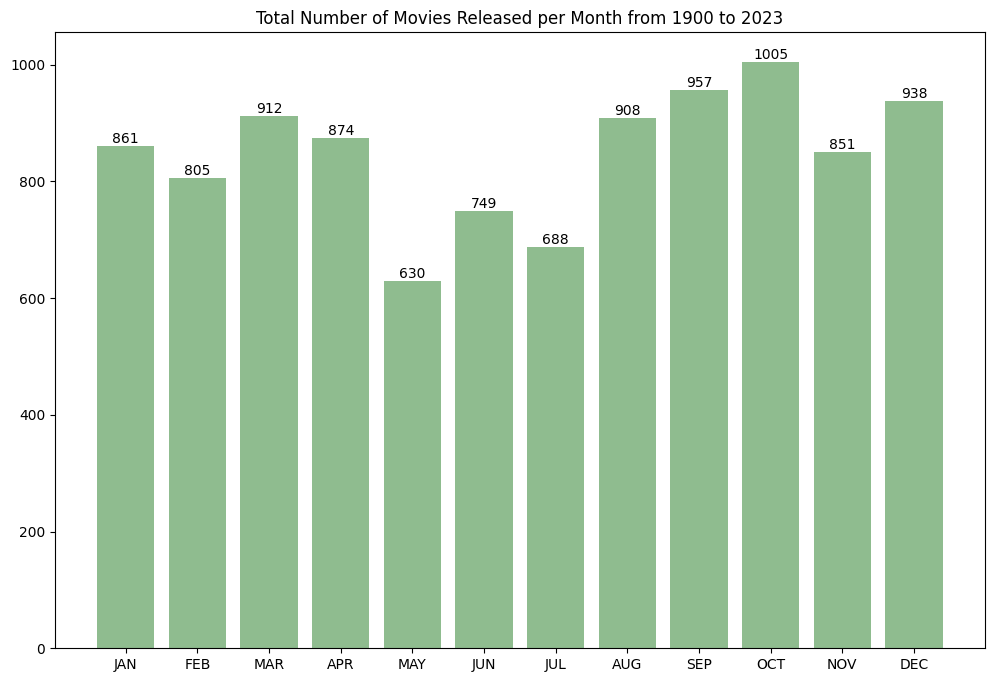

In [29]:
# now we check the number of movies released per month

months=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
month_count = df["date_x"].dt.month.value_counts().sort_index()
plt.figure(figsize=(12,8))
plt.bar(x=months, height= month_count, color = "darkseagreen")
plt.title("Total Number of Movies Released per Month from 1900 to 2023")
# Add values on top of each bar
for i, v in enumerate(month_count):
    plt.text(i, v, str(v), ha='center', va='bottom')
    